___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [487]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [488]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [489]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [490]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [492]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [493]:
df.duplicated().sum()

0

In [494]:
df_copy = df.copy()

### Data Wrangling

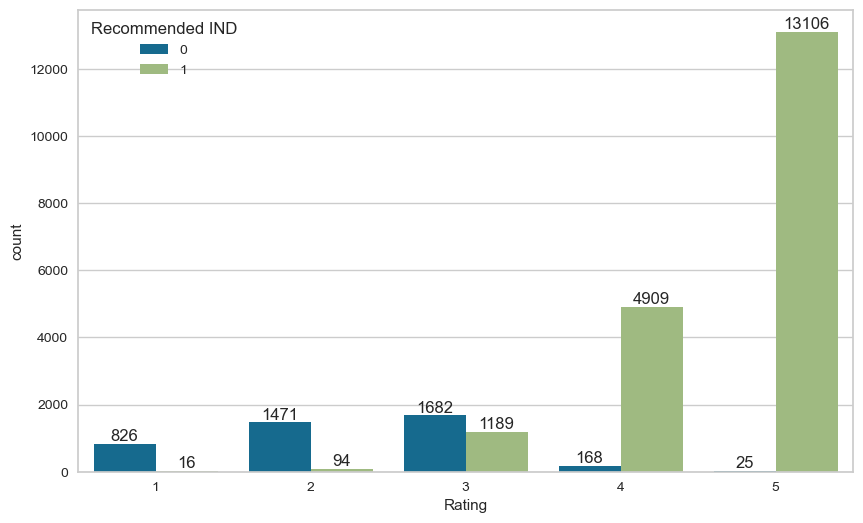

In [495]:
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

#### Check Proportion of Target Class Variable:

In [496]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [497]:
df["Recommended IND"].value_counts(normalize=True)

1    0.822362
0    0.177638
Name: Recommended IND, dtype: float64

[Text(0, 0, '4172'), Text(0, 0, '19314')]

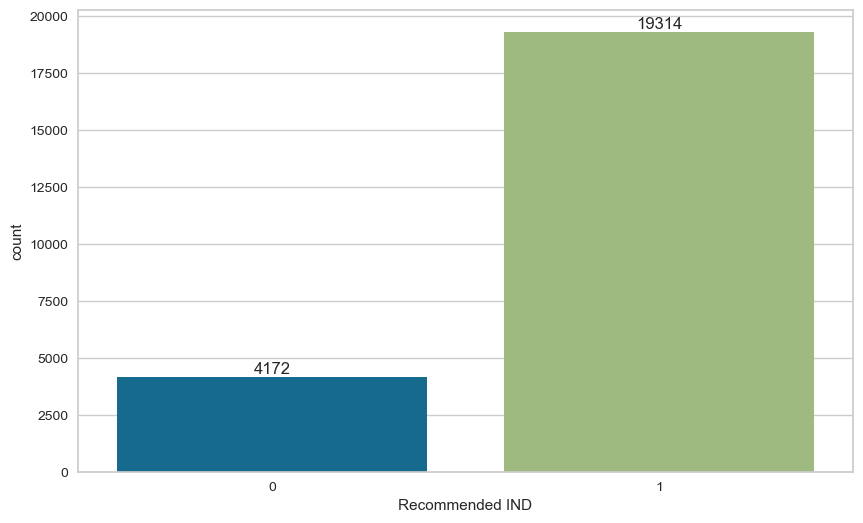

In [498]:
ax = sns.countplot(data = df, x = "Recommended IND")
ax.bar_label(ax.containers[0])

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [499]:
df = df[["Review Text", "Recommended IND"]]

In [500]:
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [501]:
df.rename(columns={"Review Text": "Review_Text", "Recommended IND": "Recommended_IND"}, inplace=True)

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review_Text      22641 non-null  object
 1   Recommended_IND  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


### Missing Value Detection

In [503]:
df.isnull().sum()

Review_Text        845
Recommended_IND      0
dtype: int64

In [504]:
df.dropna(inplace=True)

In [505]:
df.isnull().sum()

Review_Text        0
Recommended_IND    0
dtype: int64

In [506]:
df.Recommended_IND.value_counts(normalize=True)

1    0.818868
0    0.181132
Name: Recommended_IND, dtype: float64

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review_Text      22641 non-null  object
 1   Recommended_IND  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [508]:
df.Review_Text[850]

"I got two of these when they went on sale because i hate paying $68 for a basic top like this.. but for the sale price they are great! comfortable, lightweight, and flattering. the black is a little sheer, but nothing a tank underneath can't solve. a good buy!"

In [509]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [510]:
def cleaning(data):
   
    #1. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #2. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #3. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [511]:
df["Review_Text"] = df["Review_Text"].apply(cleaning)
df["Review_Text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review_Text, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [512]:
df_positive = df[df.Recommended_IND == 1]
df_positive.head()

,Review_Text,Recommended_IND
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1
6,aded basket hte last mintue see would look lik...,1


In [513]:
df_negative = df[df.Recommended_IND == 0]
df_negative.head()

,Review_Text,Recommended_IND
2,high hope dress really wanted work initially o...,0
5,love tracy reese dress one not petite foot tal...,0
10,dress run small esp zipper area run ordered sp...,0
22,first not pullover styling side zipper wouldnt...,0
25,loved material didnt really look long dress pu...,0


### Collect Words (positive and negative separately)

In [514]:
positive_words = " ".join(df_positive.Review_Text)
positive_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [515]:
negative_words = " ".join(df_negative.Review_Text)
negative_words[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [516]:
# pip install wordcloud

In [517]:
from wordcloud import WordCloud

In [518]:
worldcloud = WordCloud(background_color="black", max_words =250, colormap=plt.cm.hsv)

In [519]:
worldcloud.generate(positive_words)

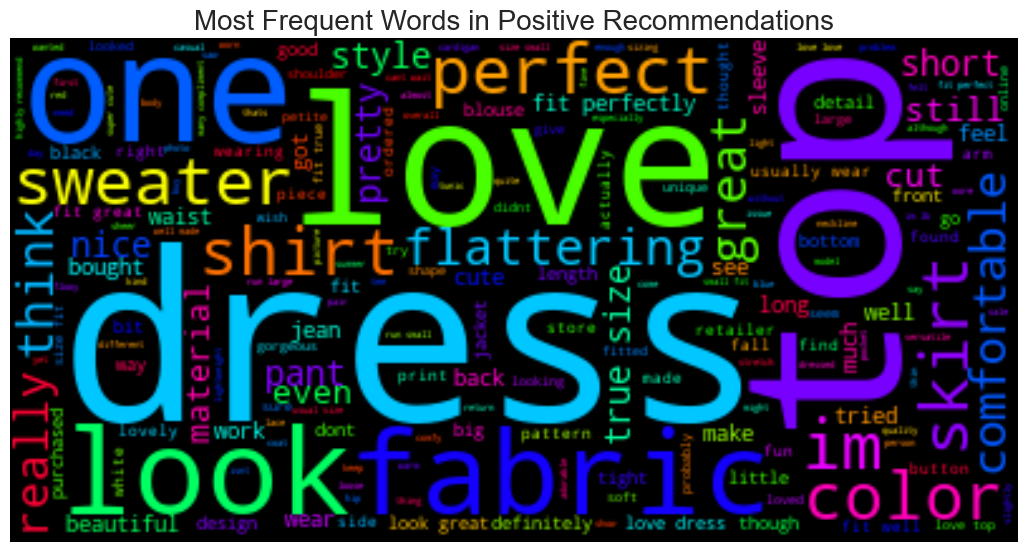

In [520]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.title("Most Frequent Words in Positive Recommendations", fontdict={"size": 20})
plt.axis("off")
plt.show()

In [521]:
worldcloud.generate(negative_words)

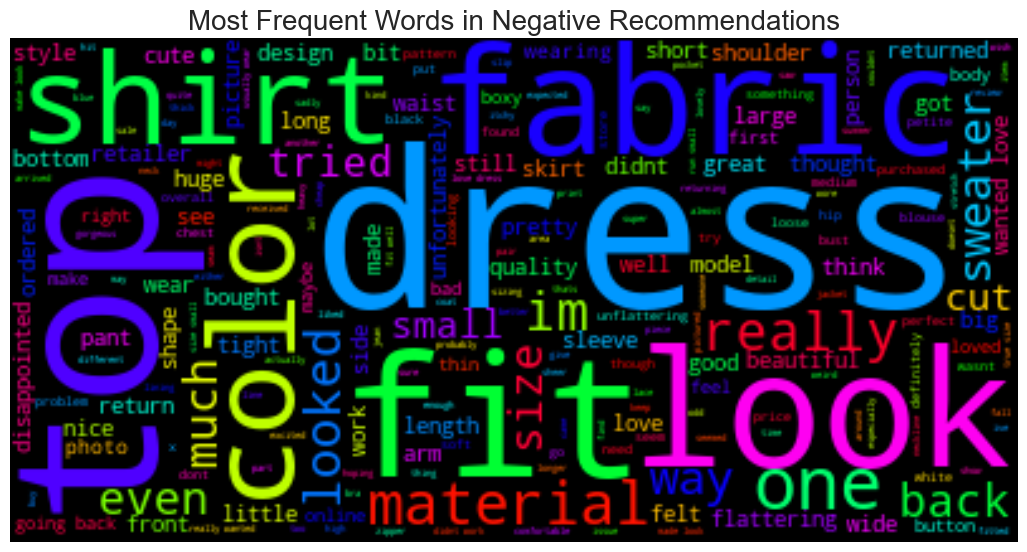

In [522]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.title("Most Frequent Words in Negative Recommendations", fontdict={"size": 20})
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [523]:
from sklearn.model_selection import train_test_split

In [524]:
X = df["Review_Text"]
y= df["Recommended_IND"]

In [525]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

In [526]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [527]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

### Count Vectorization

In [528]:
from sklearn.feature_extraction.text import CountVectorizer

In [529]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [530]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [531]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessory,accident,...,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zag,zero,zig,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [532]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [533]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)            
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

## Logistic Regression

### CountVectorizer

In [534]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)

In [535]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[ 324   86]
 [ 192 1663]]
Test_Set
              precision    recall  f1-score   support

           0       0.63      0.79      0.70       410
           1       0.95      0.90      0.92      1855

    accuracy                           0.88      2265
   macro avg       0.79      0.84      0.81      2265
weighted avg       0.89      0.88      0.88      2265

Train_Set
              precision    recall  f1-score   support

           0       0.73      0.97      0.83      3691
           1       0.99      0.92      0.95     16685

    accuracy                           0.93     20376
   macro avg       0.86      0.94      0.89     20376
weighted avg       0.94      0.93      0.93     20376



In [536]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=[0]),
            'recall-neg': make_scorer(recall_score, average=None, labels = [0]),
            'f1-neg': make_scorer(f1_score, average=None, labels = [0])}

In [537]:
# Cross Validation

model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.867738
train_accuracy         0.931690
test_precision-neg     0.603812
train_precision-neg    0.737303
test_recall-neg        0.786494
train_recall-neg       0.967699
test_f1-neg            0.682937
train_f1-neg           0.836932
dtype: float64

In [538]:
# Cross Validation with C=0.01

model = LogisticRegression(C=0.01, max_iter=1000, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.847125
train_accuracy         0.859715
test_precision-neg     0.550869
train_precision-neg    0.573159
test_recall-neg        0.847455
train_recall-neg       0.883651
test_f1-neg            0.667575
train_f1-neg           0.695315
dtype: float64

In [539]:
from sklearn.metrics import PrecisionRecallDisplay

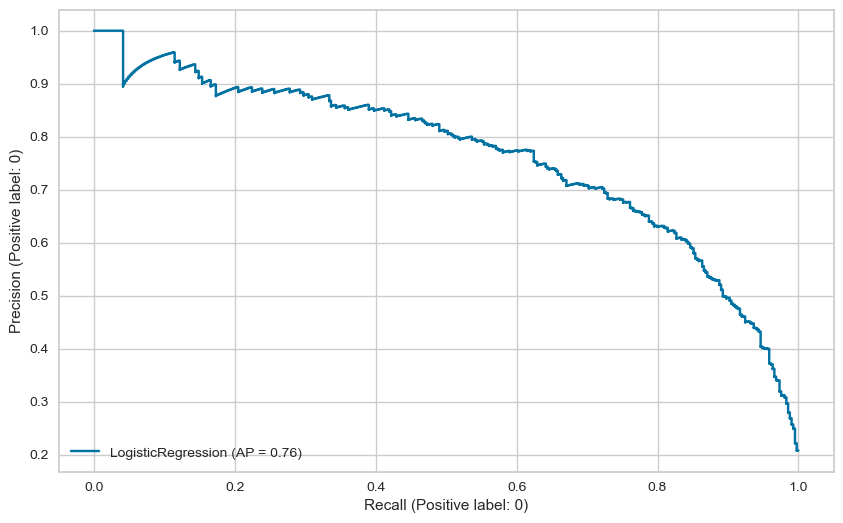

In [540]:
model = LogisticRegression(C=0.01, max_iter=1000, class_weight="balanced", random_state=101)
model.fit(X_train_count, y_train)

PrecisionRecallDisplay.from_estimator(model, X_test_count, y_test, pos_label=0)
plt.show()

### TF-IDF

In [541]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=101)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)

In [542]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[ 353   57]
 [ 218 1637]]
Test_Set
              precision    recall  f1-score   support

           0       0.62      0.86      0.72       410
           1       0.97      0.88      0.92      1855

    accuracy                           0.88      2265
   macro avg       0.79      0.87      0.82      2265
weighted avg       0.90      0.88      0.89      2265

Train_Set
              precision    recall  f1-score   support

           0       0.63      0.92      0.75      3691
           1       0.98      0.88      0.93     16685

    accuracy                           0.89     20376
   macro avg       0.81      0.90      0.84     20376
weighted avg       0.92      0.89      0.90     20376



In [543]:
# Cross Validation

model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.865627
train_accuracy         0.890923
test_precision-neg     0.589471
train_precision-neg    0.636374
test_recall-neg        0.851250
train_recall-neg       0.928264
test_f1-neg            0.696441
train_f1-neg           0.755091
dtype: float64

In [544]:
# Cross Validation with C=0.1

model = LogisticRegression(C= 0.1, max_iter=1000, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.846732
train_accuracy         0.857676
test_precision-neg     0.549227
train_precision-neg    0.568129
test_recall-neg        0.860464
train_recall-neg       0.893585
test_f1-neg            0.670365
train_f1-neg           0.694624
dtype: float64

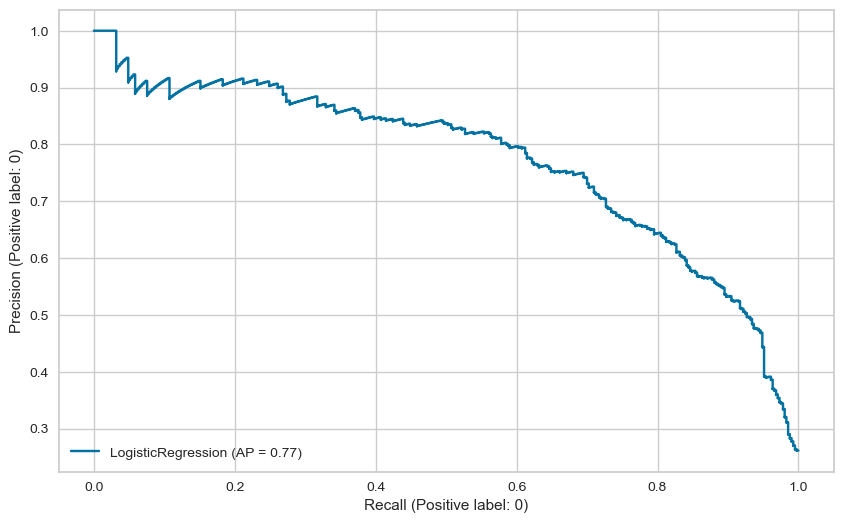

In [545]:
model = LogisticRegression(C=0.1, max_iter=1000, class_weight='balanced', random_state=101)
model.fit(X_train_tf_idf,y_train)

PrecisionRecallDisplay.from_estimator(model, X_test_tf_idf, y_test, pos_label=0)
plt.show()

## Naive Bayes 

### Countvectorizer

In [546]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.61060833, 2.76022758, 2.76022758, ..., 0.61060833, 2.76022758,
       0.61060833])

In [547]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [549]:
nb = MultinomialNB(alpha=1)  # test datasında train datasındaki unique datası arasında olmadığı zaman olasılık değerini sıfıra çeker.
                            # Bunu önlemek için bütün olasılık hesaplarını alfayı kullanarak düzenler.
                            # alfayı paya ekleyerek, paydaya da total olumlu/olumsuz sayısı ile alfayı çarpıp ekleyerek düzenlemeyi yapar.
                            # Aynı zamanda naive bayes için bir overfitting parametresidir. Bu değeri ayarlayarak overfitting'e gitme durumlarını çözebiliriz.
nb.fit(X_train_count, y_train, sample_weight=classes_weights)

MultinomialNB(alpha=1)

In [550]:
print("NB MODEL with CountVectorizer")
eval(nb, X_train_count, X_test_count)

NB MODEL with CountVectorizer
[[ 351   59]
 [ 253 1602]]
Test_Set
              precision    recall  f1-score   support

           0       0.58      0.86      0.69       410
           1       0.96      0.86      0.91      1855

    accuracy                           0.86      2265
   macro avg       0.77      0.86      0.80      2265
weighted avg       0.90      0.86      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       0.61      0.92      0.73      3691
           1       0.98      0.87      0.92     16685

    accuracy                           0.88     20376
   macro avg       0.79      0.89      0.83     20376
weighted avg       0.91      0.88      0.89     20376



In [551]:
model = MultinomialNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.857627
train_accuracy         0.878370
test_precision-neg     0.571686
train_precision-neg    0.609001
test_recall-neg        0.855854
train_recall-neg       0.917848
test_f1-neg            0.685359
train_f1-neg           0.732187
dtype: float64

In [552]:
# cross validation  with alpha=20

model = MultinomialNB(alpha=20)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.846438
train_accuracy         0.856896
test_precision-neg     0.548041
train_precision-neg    0.565906
test_recall-neg        0.875090
train_recall-neg       0.901622
test_f1-neg            0.673799
train_f1-neg           0.695363
dtype: float64

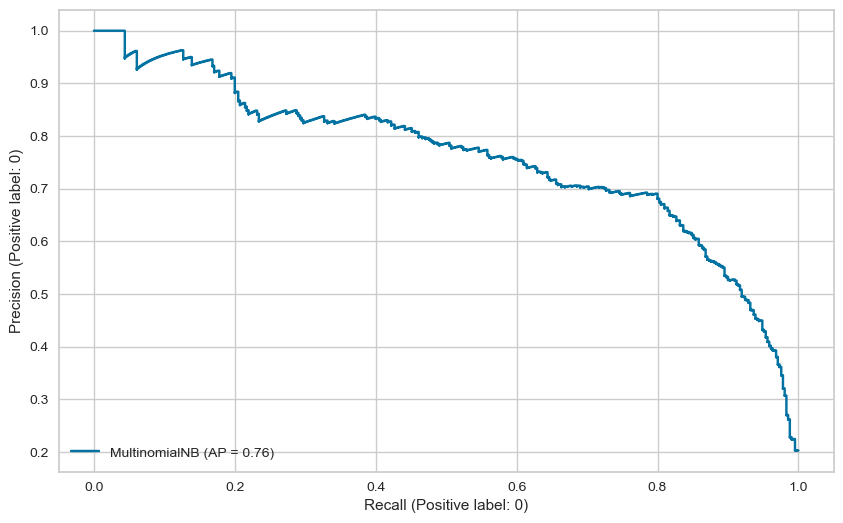

In [553]:
model = MultinomialNB(alpha=20)
model.fit(X_train_count, y_train, sample_weight=classes_weights)

PrecisionRecallDisplay.from_estimator(model, X_test_count, y_test, pos_label=0)
plt.show()

### TF-IDF

In [554]:
nb = MultinomialNB(alpha=1)  # test datasında train datasındaki unique datası arasında olmadığı zaman olasılık değerini sıfıra çeker.
                            # Bunu önlemek için bütün olasılık hesaplarını alfayı kullanarak düzenler.
                            # alfayı paya ekleyerek, paydaya da total olumlu/olumsuz sayısı ile alfayı çarpıp ekleyerek düzenlemeyi yapar.
                            # Aynı zamanda naive bayes için bir overfitting parametresidir. Bu değeri ayarlayarak overfitting'e gitme durumlarını çözebiliriz.
nb.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

MultinomialNB(alpha=1)

In [555]:
print("NB MODEL with CountVectorizer")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL with CountVectorizer
[[ 345   65]
 [ 273 1582]]
Test_Set
              precision    recall  f1-score   support

           0       0.56      0.84      0.67       410
           1       0.96      0.85      0.90      1855

    accuracy                           0.85      2265
   macro avg       0.76      0.85      0.79      2265
weighted avg       0.89      0.85      0.86      2265

Train_Set
              precision    recall  f1-score   support

           0       0.60      0.92      0.72      3691
           1       0.98      0.86      0.92     16685

    accuracy                           0.87     20376
   macro avg       0.79      0.89      0.82     20376
weighted avg       0.91      0.87      0.88     20376



In [556]:
model = MultinomialNB(alpha=1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.850904
train_accuracy         0.873380
test_precision-neg     0.557201
train_precision-neg    0.597645
test_recall-neg        0.865069
train_recall-neg       0.921250
test_f1-neg            0.677718
train_f1-neg           0.724972
dtype: float64

In [557]:
# cross validation with alpha=20

model = MultinomialNB(alpha=20)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.840548
train_accuracy         0.850799
test_precision-neg     0.536962
train_precision-neg    0.554026
test_recall-neg        0.875901
train_recall-neg       0.904241
test_f1-neg            0.665612
train_f1-neg           0.687078
dtype: float64

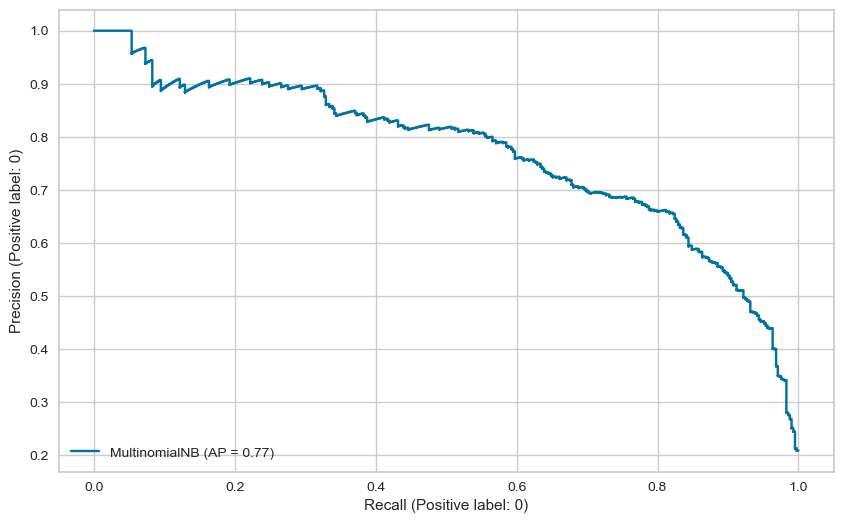

In [558]:
model = MultinomialNB(alpha=20)
model.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

PrecisionRecallDisplay.from_estimator(model, X_test_tf_idf, y_test, pos_label=0)
plt.show()

## Support Vector Machine (SVM)

### Countvectorizer

In [559]:
from sklearn.svm import LinearSVC  # daha az maliyetli olduğu için linearSVC tercih edildi.
svc = LinearSVC(class_weight="balanced")
svc.fit(X_train_count,y_train)

LinearSVC(class_weight='balanced')

In [560]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[ 289  121]
 [ 195 1660]]
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.70      0.65       410
           1       0.93      0.89      0.91      1855

    accuracy                           0.86      2265
   macro avg       0.76      0.80      0.78      2265
weighted avg       0.87      0.86      0.86      2265

Train_Set
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      3691
           1       1.00      0.95      0.97     16685

    accuracy                           0.96     20376
   macro avg       0.90      0.97      0.93     20376
weighted avg       0.96      0.96      0.96     20376



In [561]:
model = LinearSVC(class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.856106
train_accuracy         0.960351
test_precision-neg     0.585455
train_precision-neg    0.828418
test_recall-neg        0.706572
train_recall-neg       0.985189
test_f1-neg            0.640097
train_f1-neg           0.900024
dtype: float64

In [567]:
# cross validation with C=0.001 

model = LinearSVC(C=0.001, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.847419
train_accuracy         0.860266
test_precision-neg     0.551472
train_precision-neg    0.573833
test_recall-neg        0.847457
train_recall-neg       0.888467
test_f1-neg            0.668037
train_f1-neg           0.697298
dtype: float64

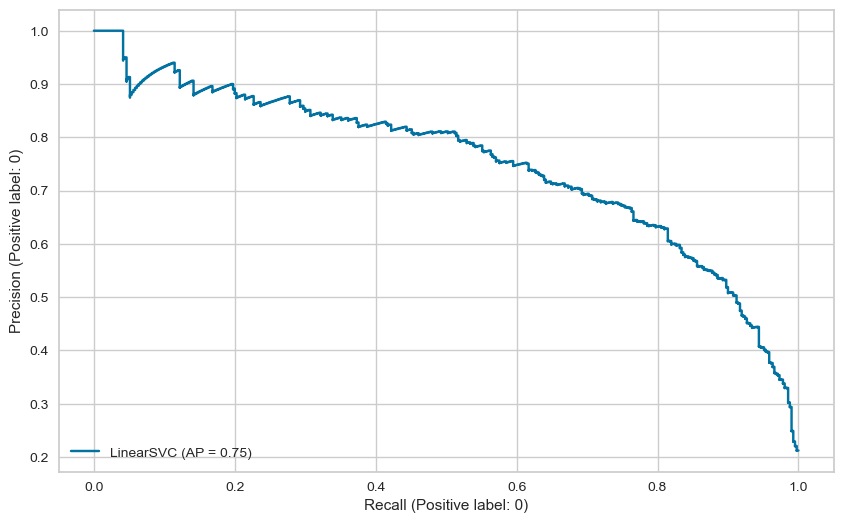

In [568]:
model = LinearSVC(C=0.001, class_weight="balanced")
model.fit(X_train_count, y_train, sample_weight=classes_weights)

PrecisionRecallDisplay.from_estimator(model, X_test_count, y_test, pos_label=0)
plt.show()

### TD-IDF

In [590]:
from sklearn.svm import LinearSVC  # daha az maliyetli olduğu için linearSVC tercih edildi.
svc = LinearSVC(class_weight="balanced")
svc.fit(X_train_tf_idf,y_train)

LinearSVC(class_weight='balanced')

In [591]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[ 329   81]
 [ 207 1648]]
Test_Set
              precision    recall  f1-score   support

           0       0.61      0.80      0.70       410
           1       0.95      0.89      0.92      1855

    accuracy                           0.87      2265
   macro avg       0.78      0.85      0.81      2265
weighted avg       0.89      0.87      0.88      2265

Train_Set
              precision    recall  f1-score   support

           0       0.72      0.97      0.82      3691
           1       0.99      0.92      0.95     16685

    accuracy                           0.93     20376
   macro avg       0.86      0.94      0.89     20376
weighted avg       0.94      0.93      0.93     20376



In [592]:
model = LinearSVC(class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.863909
train_accuracy         0.928516
test_precision-neg     0.593291
train_precision-neg    0.725739
test_recall-neg        0.791916
train_recall-neg       0.973178
test_f1-neg            0.678180
train_f1-neg           0.831435
dtype: float64

In [593]:
# cross validation with C=0.01

model = LinearSVC(C=0.01, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.845652
train_accuracy         0.855593
test_precision-neg     0.546917
train_precision-neg    0.563759
test_recall-neg        0.865070
train_recall-neg       0.896686
test_f1-neg            0.670011
train_f1-neg           0.692273
dtype: float64

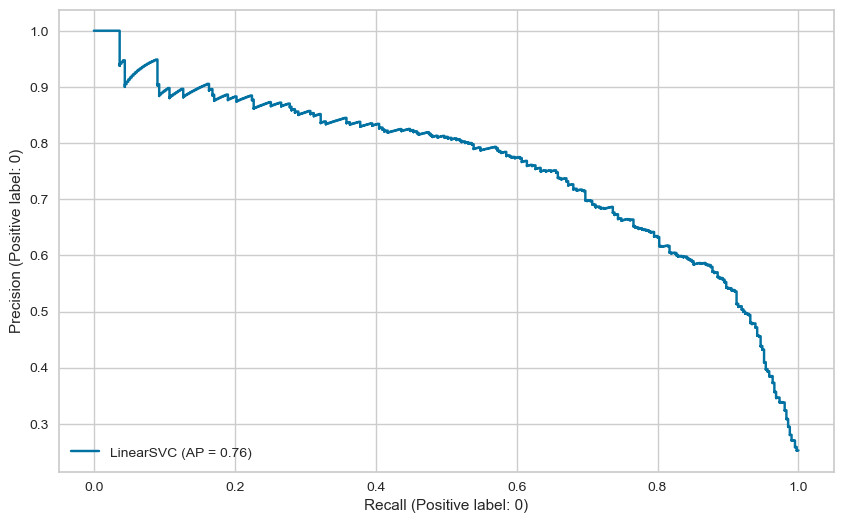

In [594]:
model = LinearSVC(C=0.01, class_weight="balanced")
model.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

PrecisionRecallDisplay.from_estimator(model, X_test_tf_idf, y_test, pos_label=0)
plt.show()

## Random Forest

### Countvectorizer

In [576]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth= 10, class_weight="balanced", random_state = 101, n_jobs = -1)
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=101)

In [577]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[ 329   81]
 [ 276 1579]]
Test_Set
              precision    recall  f1-score   support

           0       0.54      0.80      0.65       410
           1       0.95      0.85      0.90      1855

    accuracy                           0.84      2265
   macro avg       0.75      0.83      0.77      2265
weighted avg       0.88      0.84      0.85      2265

Train_Set
              precision    recall  f1-score   support

           0       0.58      0.88      0.70      3691
           1       0.97      0.86      0.91     16685

    accuracy                           0.86     20376
   macro avg       0.78      0.87      0.81     20376
weighted avg       0.90      0.86      0.87     20376



In [583]:
model = RandomForestClassifier(n_estimators=100, max_depth= 6, class_weight="balanced", random_state = 101, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.817678
train_accuracy         0.831479
test_precision-neg     0.498584
train_precision-neg    0.521182
test_recall-neg        0.826057
train_recall-neg       0.863753
test_f1-neg            0.621554
train_f1-neg           0.650018
dtype: float64

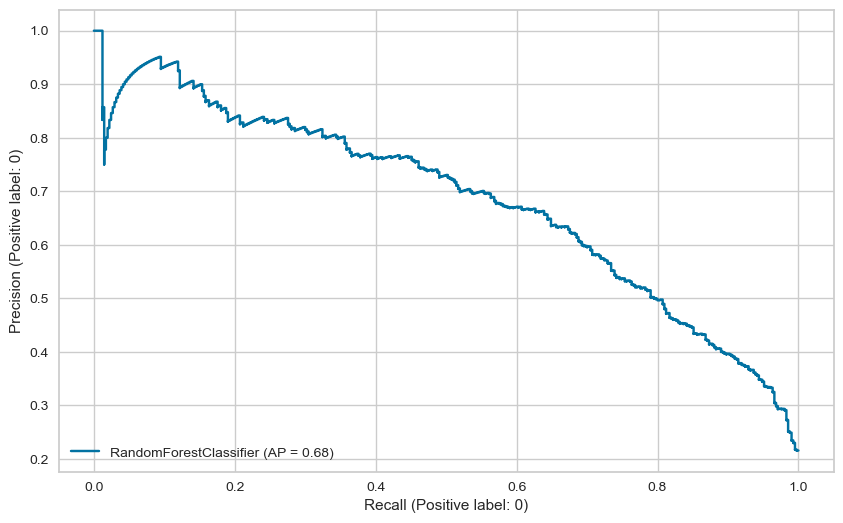

In [584]:
model = RandomForestClassifier(n_estimators=100, max_depth= 6, class_weight="balanced", random_state = 101, n_jobs = -1)
model.fit(X_train_count, y_train)

PrecisionRecallDisplay.from_estimator(model, X_test_count, y_test, pos_label=0)
plt.show()

### TF-IDF

In [595]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth= 10, class_weight="balanced", random_state = 101, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=101)

In [596]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[ 314   96]
 [ 319 1536]]
Test_Set
              precision    recall  f1-score   support

           0       0.50      0.77      0.60       410
           1       0.94      0.83      0.88      1855

    accuracy                           0.82      2265
   macro avg       0.72      0.80      0.74      2265
weighted avg       0.86      0.82      0.83      2265

Train_Set
              precision    recall  f1-score   support

           0       0.57      0.90      0.70      3691
           1       0.97      0.85      0.91     16685

    accuracy                           0.86     20376
   macro avg       0.77      0.87      0.80     20376
weighted avg       0.90      0.86      0.87     20376



In [597]:
model = RandomForestClassifier(n_estimators=100, max_depth= 5, class_weight="balanced", random_state = 101, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.800158
train_accuracy         0.816538
test_precision-neg     0.471324
train_precision-neg    0.496852
test_recall-neg        0.819012
train_recall-neg       0.867726
test_f1-neg            0.597878
train_f1-neg           0.631695
dtype: float64

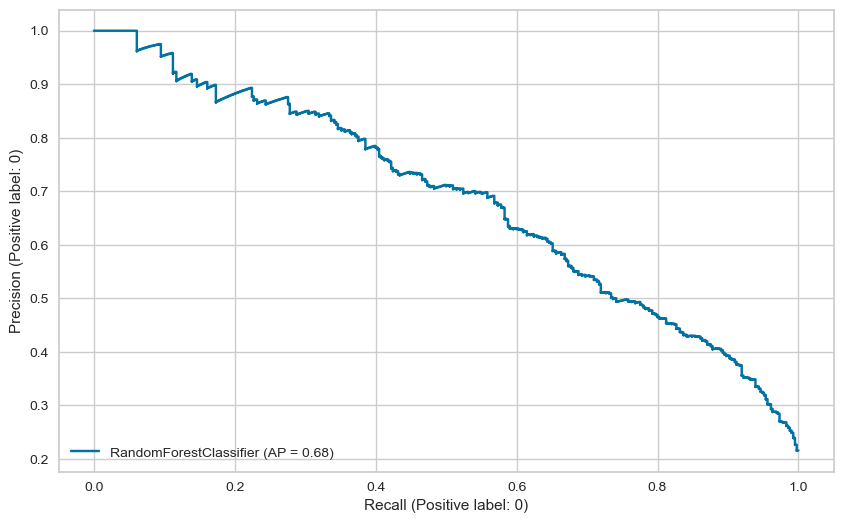

In [598]:
model = RandomForestClassifier(n_estimators=100, max_depth= 5, class_weight="balanced", random_state = 101, n_jobs = -1)
model.fit(X_train_tf_idf, y_train)

PrecisionRecallDisplay.from_estimator(model, X_test_tf_idf, y_test, pos_label=0)
plt.show()

## Ada Boosting

### Countvectorizer

In [599]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 101)
ada.fit(X_train_count, y_train, sample_weight=classes_weights)

AdaBoostClassifier(random_state=101)

In [600]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[ 316   94]
 [ 314 1541]]
Test_Set
              precision    recall  f1-score   support

           0       0.50      0.77      0.61       410
           1       0.94      0.83      0.88      1855

    accuracy                           0.82      2265
   macro avg       0.72      0.80      0.75      2265
weighted avg       0.86      0.82      0.83      2265

Train_Set
              precision    recall  f1-score   support

           0       0.51      0.79      0.62      3691
           1       0.95      0.83      0.89     16685

    accuracy                           0.82     20376
   macro avg       0.73      0.81      0.75     20376
weighted avg       0.87      0.82      0.84     20376



In [601]:
model = AdaBoostClassifier(random_state = 101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.816107
train_accuracy         0.819603
test_precision-neg     0.495529
train_precision-neg    0.501638
test_recall-neg        0.781361
train_recall-neg       0.790933
test_f1-neg            0.606288
train_f1-neg           0.613754
dtype: float64

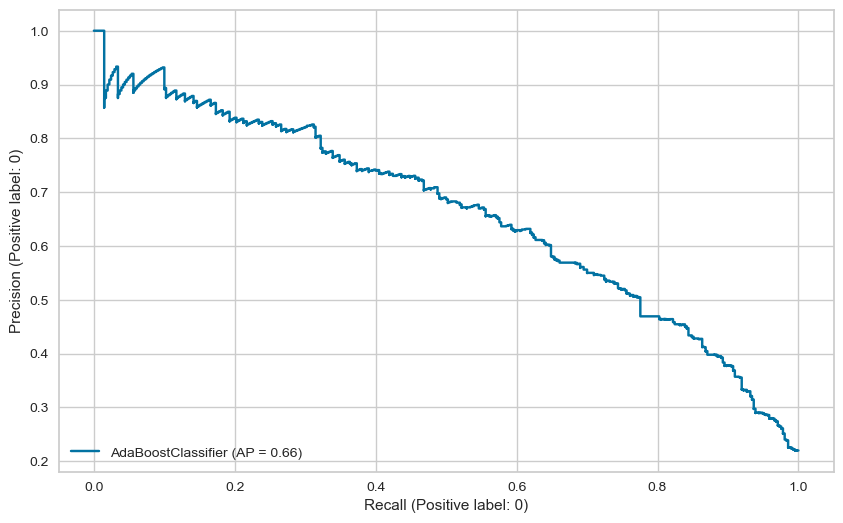

In [602]:
model = AdaBoostClassifier(random_state = 101)
model.fit(X_train_count, y_train)

PrecisionRecallDisplay.from_estimator(model, X_test_count, y_test, pos_label=0)
plt.show()

### TF-IDF

In [603]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 101)
ada.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

AdaBoostClassifier(random_state=101)

In [604]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[ 323   87]
 [ 391 1464]]
Test_Set
              precision    recall  f1-score   support

           0       0.45      0.79      0.57       410
           1       0.94      0.79      0.86      1855

    accuracy                           0.79      2265
   macro avg       0.70      0.79      0.72      2265
weighted avg       0.85      0.79      0.81      2265

Train_Set
              precision    recall  f1-score   support

           0       0.48      0.82      0.60      3691
           1       0.95      0.80      0.87     16685

    accuracy                           0.80     20376
   macro avg       0.71      0.81      0.74     20376
weighted avg       0.87      0.80      0.82     20376



In [605]:
model = AdaBoostClassifier(random_state = 101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.797901
train_accuracy         0.803931
test_precision-neg     0.467242
train_precision-neg    0.476784
test_recall-neg        0.790304
train_recall-neg       0.814143
test_f1-neg            0.586730
train_f1-neg           0.600931
dtype: float64

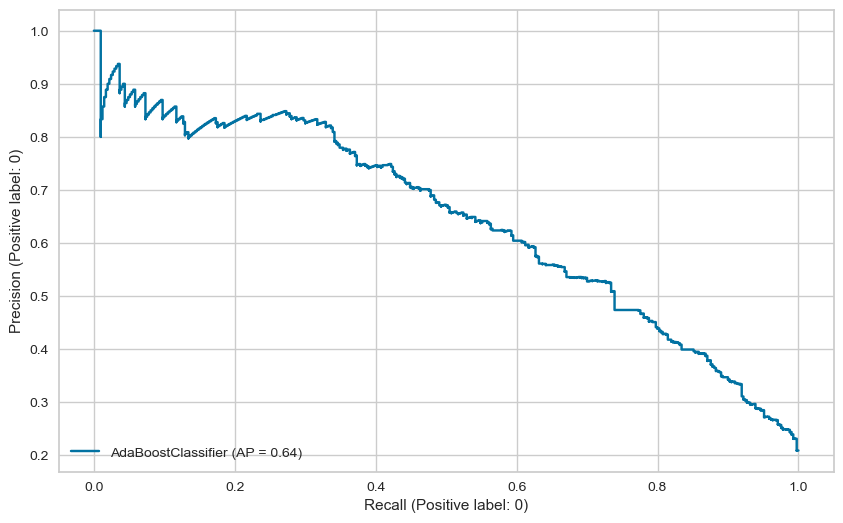

In [606]:
model = AdaBoostClassifier(random_state = 101)
model.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

PrecisionRecallDisplay.from_estimator(ada, X_test_tf_idf, y_test, pos_label=0)
plt.show()

## DL modeling

### Tokenization

### Creating word index

### Converting tokens to numeric

### Maximum number of tokens for all documents¶

### Fixing token counts of all documents (pad_sequences)

### Train Set Split

### Modeling

## BERT Modeling

### Tokenization

### Train test split

### Transformation text to tensor

### Batch Size

### Creating Model

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___